# Pair Programming Visualización III

En este ejercicio, de nuevo, trabajaremos con el csv que generamos en el ejercicio de pair programming de Pandas V, ese en el que habíamos unido distintos csv en uno.

En estos ejercicios aprenderemos a hacer algunas gráficas usando la librería seaborn. Igual que el ejercicio anterior de pair programming, para solucionar algunas preguntas tendréis que usar métodos y herramientas aprendidas anteriormente como groupby, value_counts, rename, filtrado de datos, etc.

In [16]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv("datos/attacks_pandas5.csv")
df.head()

,case_number,unnamed:_0_x,year,type,country,area,location,activity,name,sex_,age,time,species_,href,siglo,fatal_(y/n),injury,date
0,2018.06.25,0,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI,N,"No injury to occupant, outrigger canoe and pad...",25-Jun-2018
1,2018.06.03.a,6,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,Late afternoon,Tiger shark,http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI,Y,FATAL,03-Jun-2018
2,2018.05.26.b,8,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,17h00,"Bull shark, 6'",http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI,N,Lower left leg bitten,26-May-2018
3,2018.05.24,10,2018.0,Provoked,AUSTRALIA,Queensland,Cairns Aquarium,Feeding sharks,male,M,32,Morning,Grey reef shark,http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI,N,Minor bite to hand by captive shark. PROVOKED ...,24-May-2018
4,2018.05.13.a,13,2018.0,Invalid,ENGLAND,Cornwall,Off Land's End,Fishing,Max Berryman,M,21,08h15,Invalid incident,http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI,N,Injured by teeth of a dead porbeagle shark he ...,13-May-2018


### 1. Usando la librería seaborn, crea una gráfica de barras que muestre el número de personas que han hecho cada actividad en cada año. 

Hacedlo solo desde el 2015. Os podrá salir una gráfica un poco fea, no os preocupeis, es lo que esperamos.

In [49]:
df_año_2015 = df[df["year"] >= 2015]
df_año_2015.head(2)

,case_number,unnamed:_0_x,year,type,country,area,location,activity,name,sex_,age,time,species_,href,siglo,fatal_(y/n),injury,date
0,2018.06.25,0,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI,N,"No injury to occupant, outrigger canoe and pad...",25-Jun-2018
1,2018.06.03.a,6,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,Late afternoon,Tiger shark,http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI,Y,FATAL,03-Jun-2018


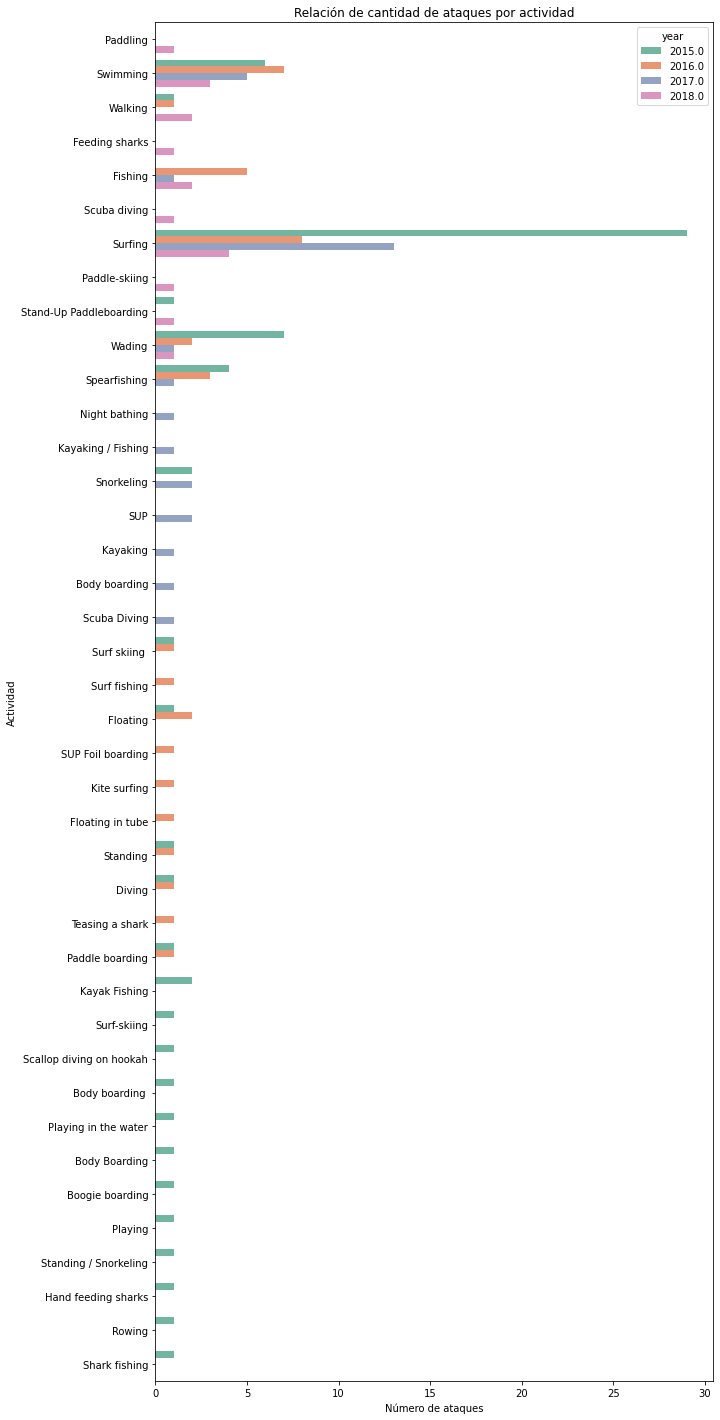

In [60]:
plt.figure(figsize = (10,25))

fig = sns.countplot(y= df_año_2015['activity'], data = df_año_2015, hue = df_año_2015["year"], palette="Set2")

fig.set(xlabel = "Número de ataques", ylabel = "Actividad")

fig.set_title('Relación de cantidad de ataques por actividad')

plt.show()

- En la gráfica anterior vemos que, con diferencia, la actividad que más se realiza durante los ataques de tiburones, es el surf. Puede que debido a eso, se creara consciencia entre los surferos, y a partir del 2015 se rebaja notablemente.

- Por otra parte, vemos que en 2015 hubo ataques en todas las actividades descritas, a diferencia de los años siguientes en que se reduce a la mitad o menos.

### 2. Usando la librería seaborn, crea una gráfica de barras que muestre el número de ataques que han ocurrido cada año en función del sexo. 

Hacedlo solo desde el 2015.

In [61]:
df_año_2015 = df_año_2015.groupby(["year", "sex_"])["case_number"].count().reset_index()
df_año_2015

,year,sex_,case_number
0,2015.0,F,12
1,2015.0,M,56
2,2016.0,F,7
3,2016.0,M,30
4,2017.0,F,9
5,2017.0,M,21
6,2018.0,F,2
7,2018.0,M,15


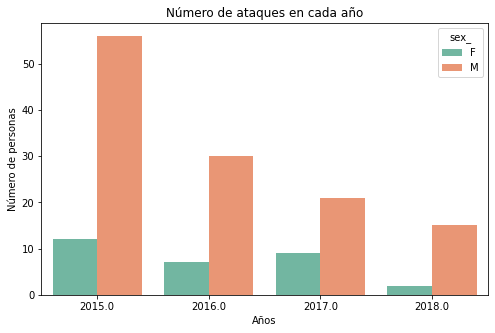

In [67]:
plt.figure(figsize = (8,5))

fig = sns.barplot(x="year", y="case_number", data=df_año_2015, hue="sex_", palette="Set2")

fig.set(xlabel = "Años", ylabel = "Número de personas")

fig.set_title("Número de ataques en cada año")

plt.show()

- En esta gráfica vemos claramente que hay muchas mas víctimas hombres que mujeres, aunque eso puede ser debido a que las mujeres realizan menos las actividades que conllevan más ataques.

### 3. ¿Cuántos ataques hubo por año? Seleccionad solo desde el año 1500.

In [71]:
df_año_1500 = df[df["year"] >= 1500]
df_año_1500.head(2)

,case_number,unnamed:_0_x,year,type,country,area,location,activity,name,sex_,age,time,species_,href,siglo,fatal_(y/n),injury,date
0,2018.06.25,0,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI,N,"No injury to occupant, outrigger canoe and pad...",25-Jun-2018
1,2018.06.03.a,6,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,Late afternoon,Tiger shark,http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI,Y,FATAL,03-Jun-2018


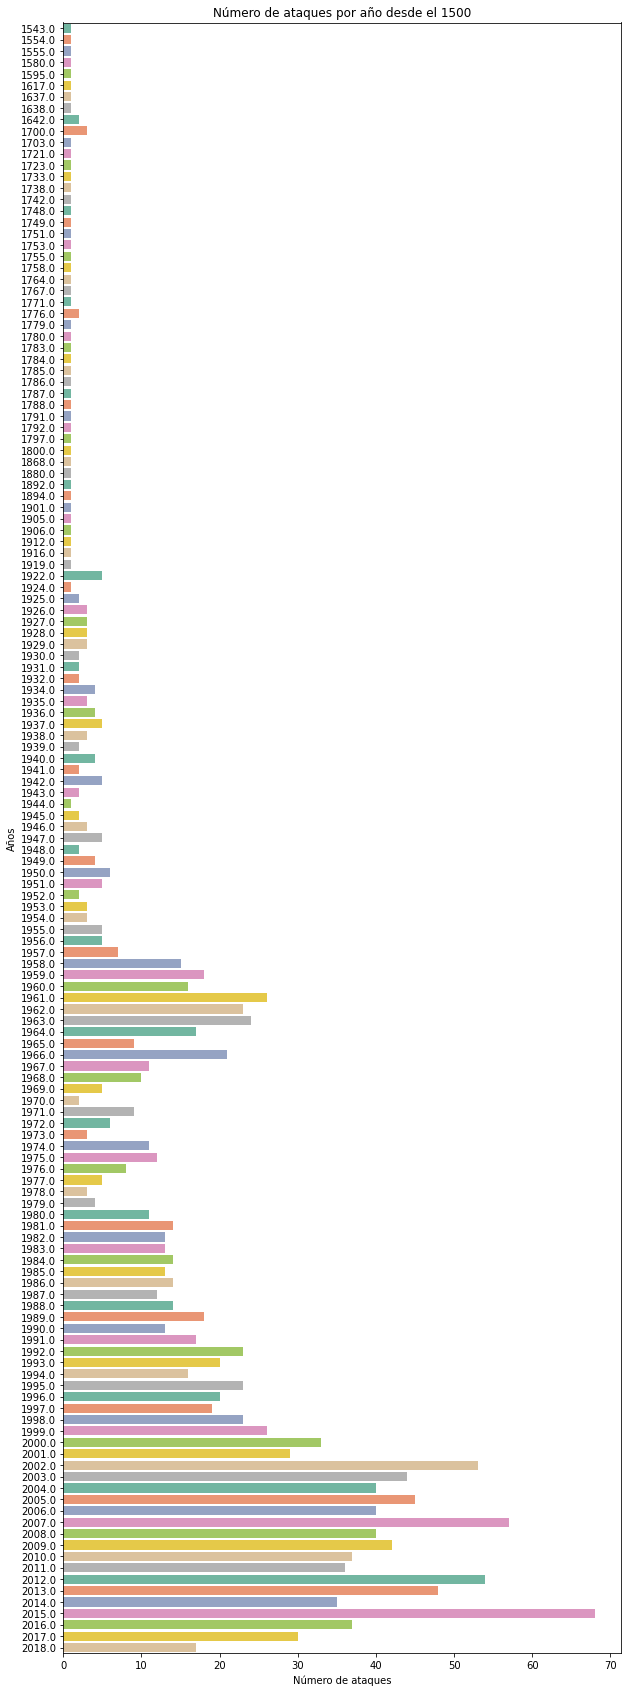

In [81]:
plt.figure(figsize = (10,30))

fig = sns.countplot(y = df_año_1500["year"], data = df_año_1500, palette="Set2")

fig.set(xlabel = "Número de ataques", ylabel = "Años")

fig.set_title("Número de ataques por año desde el 1500")

plt.show()

- En la gráfica anterior, vemos cómo los ataques tienen un auge en los años 60, lo que podría ser provocado por el auge del surf en Estados Unidos, y cómo aumentan considerablemente a partir de los años 80. Justo la década en que ir de vacaciones, se convirtió en un hábito entre la clase media.

### 4. Seleccionad solo los registros de USA, AUSTRALIA y SOUTH AFRICA. Muestra el número de ataques por país y año desde el año 1900.

In [85]:
df_paises = df[((df["country"] == "USA") | (df["country"] == "AUSTRALIA") | (df["country"] == "SOUTH AFRICA")) & (df["year"] > 1900)]
df_paises.head()

,case_number,unnamed:_0_x,year,type,country,area,location,activity,name,sex_,age,time,species_,href,siglo,fatal_(y/n),injury,date
0,2018.06.25,0,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI,N,"No injury to occupant, outrigger canoe and pad...",25-Jun-2018
2,2018.05.26.b,8,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,17h00,"Bull shark, 6'",http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI,N,Lower left leg bitten,26-May-2018
3,2018.05.24,10,2018.0,Provoked,AUSTRALIA,Queensland,Cairns Aquarium,Feeding sharks,male,M,32,Morning,Grey reef shark,http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI,N,Minor bite to hand by captive shark. PROVOKED ...,24-May-2018
6,2018.04.25.a,21,2018.0,Unprovoked,AUSTRALIA,Western Australia,"Surfers Point, Prevelly",Surfing,Rob Bruce,M,60,09h30,3 m shark,http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI,N,"No injury, knocked off board by shark",25-Apr-2018
8,2018.04.22,24,2018.0,Unprovoked,SOUTH AFRICA,Western Cape Province,"Robberg Beach, Plettenberg Bay",Paddle-skiing,male,M,33,09h40,"White shark, 2.5 m",http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI,N,"No injury, shark bit hole in ski",22-Apr-2018


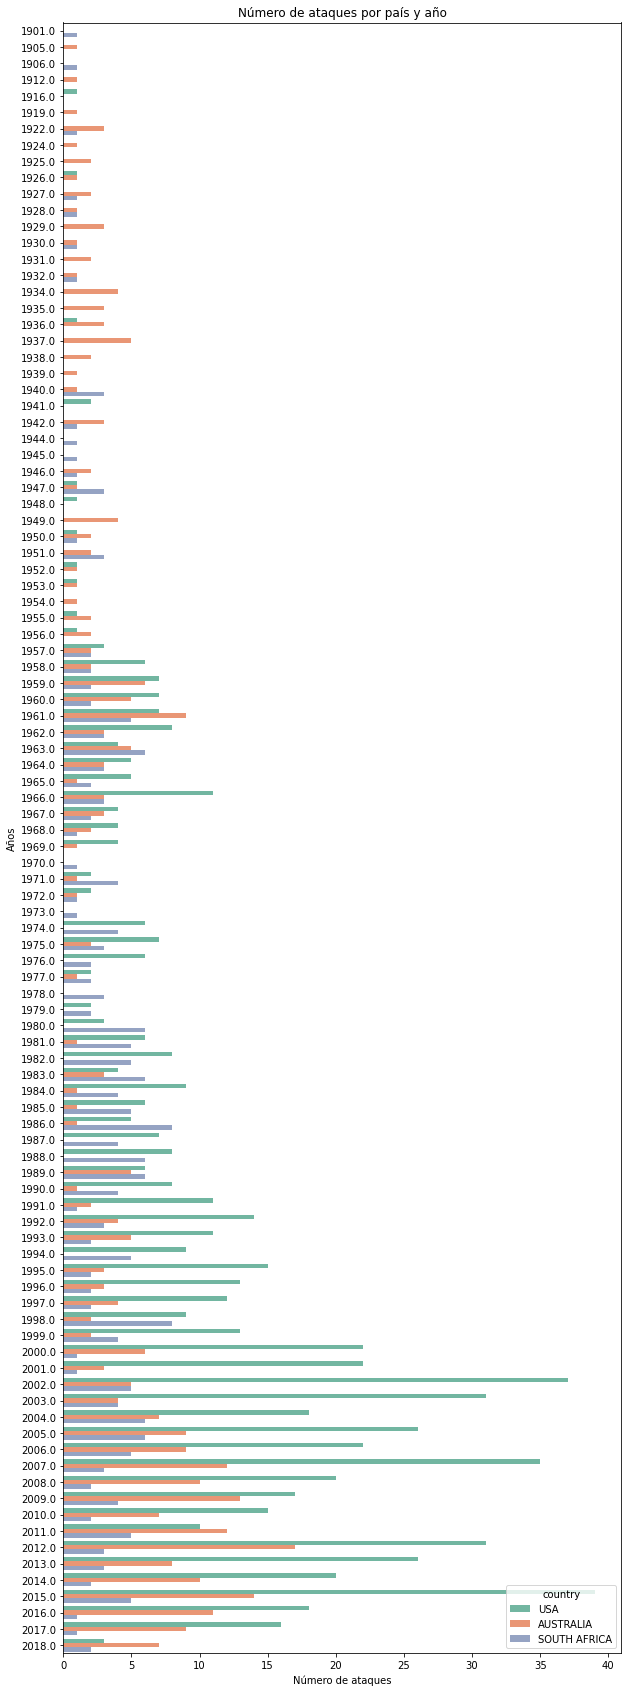

In [87]:
plt.figure(figsize = (10,30))

fig = sns.countplot(y = "year", data = df_paises, hue = "country", palette="Set2")

fig.set(ylabel = "Años", xlabel = "Número de ataques")

fig.set_title("Número de ataques por país y año")

plt.show()

- En esta gráfica, como hemos visto anteriormente, Estados Unidos encabeza el número de ataques, aunque Australia y South Africa también tienen un número considerable de casos. Aquí, de nuevo, la popularidad del Surf jugó un papel importante.

### 5. Realizad un boxplot donde se muestre los principales estadísticos del número de ataques por país.

In [107]:
df_ataque_paises = df.groupby('country')['case_number'].count().reset_index(name = "ataques")
df_ataque_paises.head()

,country,ataques
0,AMERICAN SAMOA,2
1,ARGENTINA,1
2,ASIA?,1
3,AUSTRALIA,343
4,BAHAMAS,29


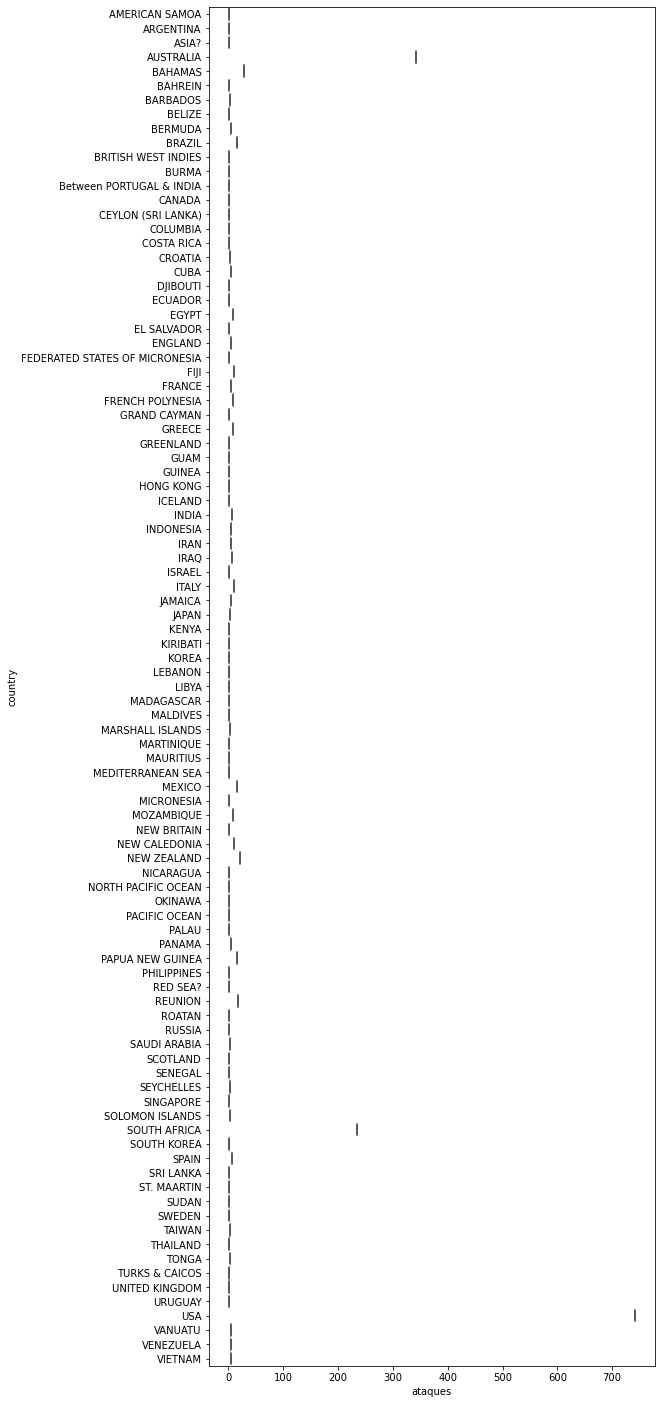

In [108]:
plt.figure(figsize = (8,25))
sns.boxplot(y = 'country', x = 'ataques', data = df_ataque_paises, palette="Set2")

fig.set(ylabel = 'Países')

fig.set_title('Ataques por país')

plt.show()

- Aquí vemos, como comparandola con la gráfica anterior, los tres países que despuntan podrían afectar negativamente a la media, pues seria menos representativa.

📌 NOTA Somos analistas y no nos vale con sacar las gráficas. Incluid una celda de markdown donde expliqueis que es lo que estamos viendo en las gráficas, es decir, haced una interpretación de los resultados.
Happy coding 🦈